In [3]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 7.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 9.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 8.1 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.6 MB/s eta 0:00:00a 0:00:01


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [7]:
### data can be downloaded from
### https://www.kaggle.com/carlosparadis/fires-from-space-australia-and-new-zeland

# Explore data

In [10]:
df = pd.read_csv("fire_archive_M6_96619.csv",
                 usecols=["latitude", "longitude", "brightness", "acq_date"],
                 parse_dates=["acq_date"])

df.head()

,latitude,longitude,brightness,acq_date
0,-11.8070,142.0583,313.0,2019-08-01
1,-11.7924,142.0850,319.3,2019-08-01
2,-12.8398,132.8744,311.6,2019-08-01
3,-14.4306,143.3035,310.1,2019-08-01
4,-12.4953,131.4897,310.3,2019-08-01


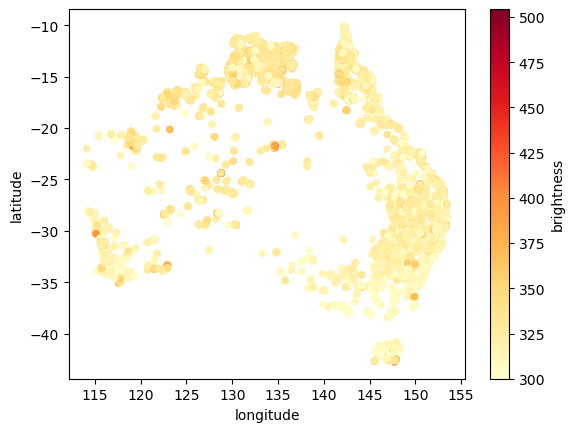

In [12]:
df.plot(x="longitude", y="latitude", kind="scatter", c="brightness", colormap="YlOrRd")
plt.show()

# Geopandas

In [15]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

countries.head()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

<AxesSubplot:>

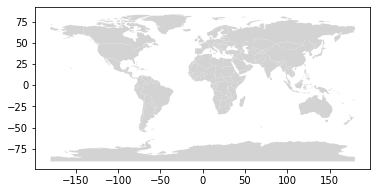

In [6]:
countries.plot(color="lightgrey")

<AxesSubplot:>

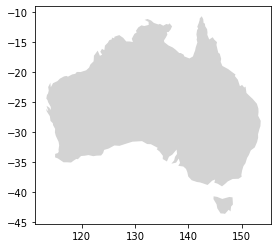

In [7]:
countries[countries["name"] == "Australia"].plot(color="lightgrey")

# Combine scatter plot with Geopandas

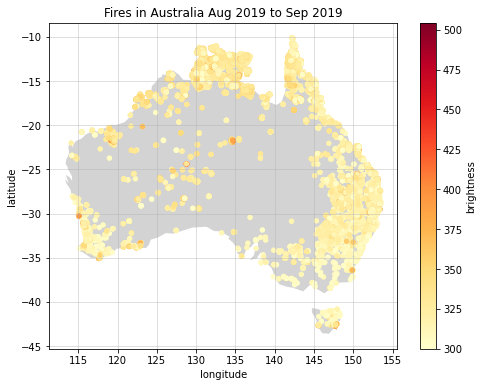

In [8]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Australia"].plot(color="lightgrey", ax=ax)

# parse dates for plot's title
first_month = df["acq_date"].min().strftime("%b %Y")
last_month = df["acq_date"].max().strftime("%b %Y")

# plot points
df.plot(x="longitude", y="latitude", kind="scatter", c="brightness", colormap="YlOrRd", 
        title=f"Fires in Australia {first_month} to {last_month}", ax=ax)

# add grid
ax.grid(b=True, alpha=0.5)

plt.show()

# Bonus - extra styling

## Minor grid

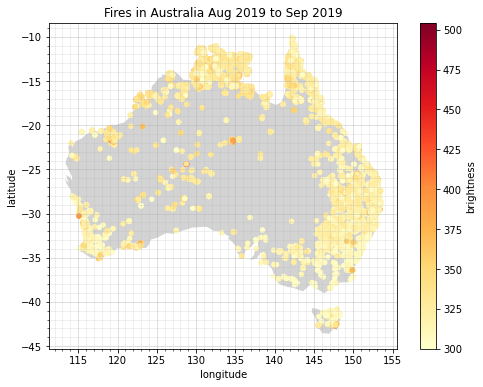

In [9]:
# get axes limits
x_lo, x_up = ax.get_xlim()
y_lo, y_up = ax.get_ylim()

# add minor ticks with a specified sapcing (deg)
deg = 1
ax.set_xticks(np.arange(np.ceil(x_lo), np.ceil(x_up), deg), minor=True)
ax.set_yticks(np.arange(np.ceil(y_lo), np.ceil(y_up), deg), minor=True)
ax.grid(b=True, which="minor", alpha=0.25)

fig

## Colorbar

In [10]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

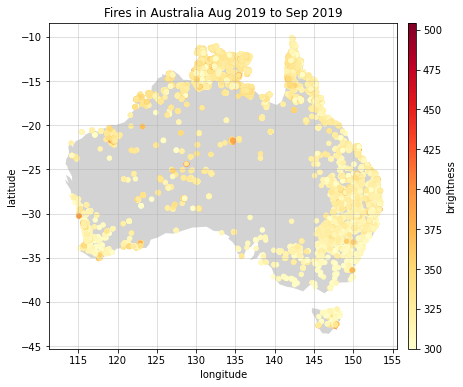

In [11]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Australia"].plot(color="lightgrey", ax=ax)

# parse dates for plot's title
first_month = df["acq_date"].min().strftime("%b %Y")
last_month = df["acq_date"].max().strftime("%b %Y")

# plot points
df.plot(x="longitude", y="latitude", kind="scatter", c="brightness", colormap="YlOrRd", 
        title=f"Fires in Australia {first_month} to {last_month}", ax=ax, colorbar=False)

# define colorbar values
norm = mpl.colors.Normalize(vmin=df["brightness"].min(), vmax=df["brightness"].max())

# set colorbar on ax
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=-0.15)
mpl.colorbar.ColorbarBase(cax, cmap=mpl.cm.YlOrRd, norm=norm, label="brightness")

# add grid
ax.grid(b=True, alpha=0.5)

plt.show()

# Fires by date

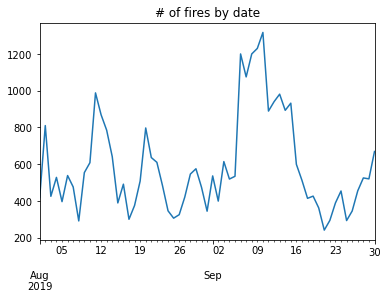

In [12]:
# create a Series containing number of events per date
count_per_date = df["acq_date"].value_counts().sort_index()
count_per_date.plot(title="# of fires by date")
plt.show()